## WeGo Data Introduction

In [1]:
import pandas as pd

In [4]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [7]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [8]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [9]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [10]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [11]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [12]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [13]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [14]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [15]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


### 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [26]:
pd.set_option('display.max_columns', None)

In [29]:
#df[df["col"] > 60]
wego[wego['ADHERENCE']< -100].sort_values('DATE')


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3231,120230801,1,99462269,2023-08-01,52,5204,1489,347283,0,FROM DOWNTOWN,HCKP,9.0,2,36.048934,-86.713854,2023-08-01 11:54:00,2023-08-01 15:55:42,2023-08-01 15:55:42,-241.700000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
3251,120230801,1,99462289,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,HCKP,9.0,2,36.048934,-86.713854,2023-08-01 15:57:00,2023-08-01 18:09:12,2023-08-01 18:09:12,-132.200000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
3250,120230801,1,99462288,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,WMRT,5.0,0,36.082309,-86.727340,2023-08-01 15:45:00,2023-08-01 17:58:57,2023-08-01 17:58:57,-133.950000,10.0,4.300000,-5.700000,0,1,0,0,0.0,0,0.000000,NaN
3249,120230801,1,99462287,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,THNV,4.0,0,36.111844,-86.745821,2023-08-01 15:33:00,2023-08-01 17:44:10,2023-08-01 17:46:08,-133.133333,10.0,5.283333,-4.716667,0,1,0,0,0.0,0,1.966666,NaN
3248,120230801,1,99462286,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,NVFG,3.0,0,36.135034,-86.759818,2023-08-01 15:26:00,2023-08-01 17:38:02,2023-08-01 17:38:02,-132.033333,10.0,8.350000,-1.650000,0,1,0,0,0.0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330224,120230927,1,100317664,2023-09-27,52,5214,332,352271,0,TO DOWNTOWN,THNV,4.0,0,36.112037,-86.745666,2023-09-27 08:58:00,2023-09-27 10:59:03,2023-09-27 10:59:03,-121.050000,10.0,16.550000,6.550000,0,1,0,0,0.0,0,0.000000,NaN
329794,120230927,1,100317216,2023-09-27,52,5202,1800,352066,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-09-27 19:55:00,2023-09-27 21:51:58,2023-09-27 22:00:54,-125.900000,20.0,21.616666,1.616666,0,1,0,1,0.0,0,8.933333,10.0
329793,120230927,1,100317215,2023-09-27,52,5202,1800,352065,0,TO DOWNTOWN,MCC4_19,2.0,2,36.167091,-86.781923,2023-09-27 19:45:00,2023-09-27 21:51:58,2023-09-27 21:51:58,-126.966666,NaN,NaN,NaN,0,1,0,1,NaN,0,0.000000,NaN
330225,120230927,1,100317665,2023-09-27,52,5214,332,352271,0,TO DOWNTOWN,NVFG,3.0,0,36.135392,-86.759737,2023-09-27 09:04:00,2023-09-27 11:03:09,2023-09-27 11:03:09,-119.150000,10.0,15.100000,5.100000,0,1,0,1,0.0,0,0.000000,NaN


In [30]:
wego[wego['ADHERENCE']< -100].sort_values('ADHERENCE')

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
103162,120230818,1,99963004,2023-08-18,52,5202,1052,352052,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-18 06:15:00,2023-08-18 06:07:02,2023-08-18 22:03:32,-948.533333,15.0,30.583333,15.583333,0,1,0,0,0.0,0,956.500000,8.0
19788,120230804,1,99559760,2023-08-04,22,2211,1743,350239,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-04 07:00:00,2023-08-04 06:48:12,2023-08-04 18:15:00,-675.000000,15.0,8.233333,-6.766667,0,1,0,0,0.0,0,686.800000,5.0
340625,120230929,1,100377605,2023-09-29,23,2312,1394,350478,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-29 05:37:00,2023-09-29 05:59:30,2023-09-29 15:55:10,-618.166666,12.0,13.683333,1.683333,0,1,0,0,0.0,0,595.666666,2.0
30377,120230806,3,99601907,2023-08-06,23,2311,2642,350455,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-06 06:00:00,2023-08-06 06:26:26,2023-08-06 15:02:14,-542.233333,20.0,18.716666,-1.283334,0,1,0,0,0.0,0,515.800000,2.0
229460,120230910,3,100599172,2023-09-10,23,2311,2642,350455,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-10 06:00:00,2023-09-10 06:26:36,2023-09-10 14:59:56,-539.933333,20.0,65.200000,45.200000,0,1,0,0,0.0,0,513.333333,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24490,120230804,1,99565680,2023-08-04,56,5601,1603,352789,0,TO DOWNTOWN,MCC4_18,6.0,2,36.167091,-86.781923,2023-08-04 09:05:00,2023-08-04 10:48:44,2023-08-04 10:48:44,-103.733333,NaN,NaN,NaN,0,1,0,1,NaN,0,0.000000,NaN
93538,120230816,1,99900948,2023-08-16,50,9950,2497,354098,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,2023-08-16 15:37:00,2023-08-16 17:14:32,2023-08-16 17:19:42,-102.700000,NaN,NaN,NaN,0,1,0,0,NaN,0,5.166666,NaN
3242,120230801,1,99462280,2023-08-01,52,5204,1542,347286,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 14:14:00,2023-08-01 15:55:46,2023-08-01 15:55:46,-101.766666,25.0,4.616666,-20.383334,0,1,0,1,0.0,1,0.000000,NaN
253482,120230914,1,99948675,2023-09-14,23,2313,1368,350553,0,FROM DOWNTOWN,DWMRT,5.0,0,36.244207,-86.760509,2023-09-14 09:24:00,2023-09-14 11:04:50,2023-09-14 11:04:50,-100.833333,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN


In [31]:
wego['ADHERENCE'].describe()

count    338861.000000
mean         -3.188796
std           6.898842
min        -948.533333
25%          -4.566666
50%          -2.000000
75%          -0.333333
max          88.383333
Name: ADHERENCE, dtype: float64

In [33]:
wego_hour_range = wego[wego['ADHERENCE'].between(-60, 60)]

In [34]:
wego_hour_range['ADHERENCE'].describe()

count    338528.000000
mean         -3.094854
std           5.169584
min         -59.816666
25%          -4.550000
50%          -2.000000
75%          -0.333333
max          59.950000
Name: ADHERENCE, dtype: float64

In [38]:
from matplotlib import pyplot as plt

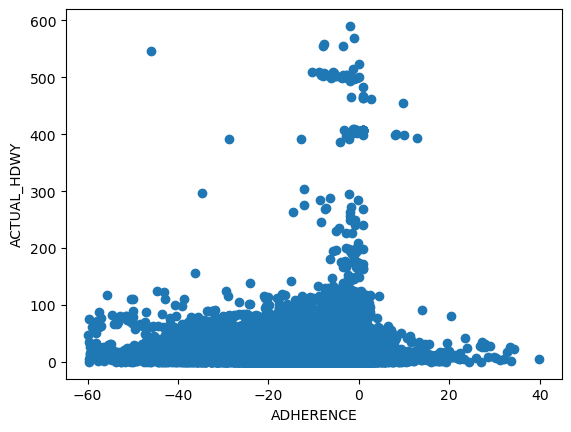

In [40]:
plt.scatter(wego_hour_range['ADHERENCE'], wego_hour_range['ACTUAL_HDWY'])
plt.ylabel('ACTUAL_HDWY')
plt.xlabel('ADHERENCE')
plt.show()


In [60]:
wego_on_time= wego_hour_range['ADJUSTED_ONTIME_COUNT'].sum()

In [61]:
wego_on_time

270048

In [62]:
wego_late = wego_hour_range['ADJUSTED_LATE_COUNT'].sum()

In [63]:
wego_early = wego_hour_range['ADJUSTED_EARLY_COUNT'].sum()

In [64]:
wego_late

58735

In [65]:
wego_early

9745

In [66]:
wego_all= wego_late + wego_early + wego_on_time
wego_all

338528

In [67]:
wego_timely_pct= wego_on_time/wego_all *100

In [68]:
wego_timely_pct.round(2)

79.77

In [ ]:
wego_late

### 2. How does direction of travel, route, or location affect the headway and on-time performance?

In [78]:
# (
# wego_hour_range
#     .loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
#     [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
#       'SCHEDULED_TIME', 'SCHEDULED_HDWY',
#       'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
#      ]]
#     .value_counts('ADJUSTED_ONTIME_COUNT')
# )

wego_todt_ontime = wego_hour_range.loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN'].loc[wego_hour_range['ADJUSTED_ONTIME_COUNT'] == 1].sort_values('HDWY_DEV', ascending=False)

In [77]:
wego_todt_ontime

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0
350306,120230930,2,100406592,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 18:45:00,2023-09-30 18:49:46,2023-09-30 18:49:46,-4.766666,30.0,30.966666,0.966666,0,0,1,0,0.0,0,0.000000,NaN
350307,120230930,2,100406593,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 19:03:00,2023-09-30 19:06:51,2023-09-30 19:06:51,-3.850000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0


In [83]:
wego_todt_ontime.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,1.356340e+05,135634.000000,1.356340e+05,135634.000000,135634.000000,135634.000000,135634.000000,135634.000000,135634.000000,135634.000000,135634.000000,135634.000000,135634.000000,105427.000000,105361.000000,105312.000000,135634.0,135634.0,135634.0,135634.000000,107667.000000,135634.000000,135634.000000,24722.000000
mean,1.202309e+08,1.298841,1.001043e+08,38.072991,3821.968813,1894.149962,351578.959103,0.001910,7.179579,0.635659,36.153351,-86.773975,-1.186040,19.081725,19.057456,-0.020162,0.0,0.0,1.0,0.011782,0.015706,0.002750,3.826503,15.971038
std,5.058504e+01,0.634160,3.234738e+05,20.419530,2054.696125,769.841257,1498.894871,0.052827,4.060673,0.802490,0.054893,0.066744,2.467696,12.501935,14.067941,5.942226,0.0,0.0,0.0,0.107903,0.124335,0.052369,8.325884,7.526540
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-6.000000,0.000000,0.000000,-42.683334,0.0,0.0,1.0,0.000000,0.000000,0.000000,-12.766666,0.000000
25%,1.202308e+08,1.000000,9.986488e+07,22.000000,2210.000000,1361.000000,350903.000000,0.000000,4.000000,0.000000,36.125659,-86.814445,-2.750000,10.000000,11.233333,-1.983334,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,11.000000
50%,1.202308e+08,1.000000,1.001347e+08,50.000000,5004.000000,1915.000000,351945.000000,0.000000,6.000000,0.000000,36.152077,-86.781923,-1.216666,15.000000,16.066666,-0.100000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,16.000000
75%,1.202309e+08,1.000000,1.003480e+08,55.000000,5504.000000,2545.000000,352639.000000,0.000000,10.000000,1.000000,36.175714,-86.726914,-0.050000,21.000000,23.216666,1.600000,0.0,0.0,1.0,0.000000,0.000000,0.000000,2.233333,20.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,3.000000,17.000000,2.000000,36.300470,-86.636862,34.716666,407.000000,568.833333,543.833333,0.0,0.0,1.0,1.000000,1.000000,1.000000,262.900000,61.000000


In [91]:
#wego_todt_ontime.unique('ROUTE_ABBR')
wego_filter_rt= wego_todt_ontime.filter(items= ['ROUTE_ABBR'])

In [93]:
wego_filter_rt.value_counts()

ROUTE_ABBR
55            22847
56            22010
52            20337
3             19069
50            18521
23            14491
22            11484
7              6875
Name: count, dtype: int64

In [99]:
wego_7= wego_hour_range.loc[wego_hour_range['ROUTE_ABBR'] == 7]

In [100]:
wego_7

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 14:31:00,2023-08-01 14:31:27,2023-08-01 14:31:27,-0.450000,15.0,1.150000,-13.850000,0,0,1,0,0.0,0,0.000000,NaN
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 14:41:00,2023-08-01 14:46:54,2023-08-01 14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,0.000000,NaN
2125,120230801,1,99460958,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,MCC5_12,2.0,2,36.167091,-86.781923,2023-08-01 15:00:00,2023-08-01 15:05:41,2023-08-01 15:05:41,-5.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
6136,120230801,1,99465617,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,2023-08-01 05:40:00,2023-08-01 05:09:44,2023-08-01 05:09:44,30.266666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
6137,120230801,1,99465618,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 05:46:00,2023-08-01 05:09:44,2023-08-01 05:11:45,34.250000,NaN,NaN,NaN,1,0,0,0,0.0,0,2.016666,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [105]:
wego_7_todt= wego_todt_ontime.loc[wego_hour_range['ROUTE_ABBR'] == 7]

In [106]:
wego_7_todt

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
114418,120230820,3,100012923,2023-08-20,7,702,2312,353470,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-20 21:16:00,2023-08-20 21:18:32,2023-08-20 21:20:47,-4.783333,28.0,65.666666,37.666666,0,0,1,0,0.0,0,2.250000,5.0
59585,120230810,1,99724056,2023-08-10,7,705,2427,353518,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-10 17:40:00,2023-08-10 17:24:13,2023-08-10 17:41:53,-1.883333,15.0,50.950000,35.950000,0,0,1,0,0.0,0,17.666666,18.0
59586,120230810,1,99724057,2023-08-10,7,705,2427,353518,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-10 17:49:00,2023-08-10 17:49:01,2023-08-10 17:49:01,-0.016666,15.0,49.183333,34.183333,0,0,1,0,0.0,0,0.000000,NaN
273262,120230917,3,100030139,2023-09-17,7,702,2312,353466,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-17 18:45:00,2023-09-17 18:50:23,2023-09-17 18:50:23,-5.383333,30.0,63.166666,33.166666,0,0,1,0,0.0,0,0.000000,NaN
114412,120230820,3,100012917,2023-08-20,7,702,2312,353468,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-20 20:11:00,2023-08-20 19:48:49,2023-08-20 20:15:07,-4.116666,30.0,63.166666,33.166666,0,0,1,0,0.0,0,26.300000,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350271,120230930,2,100406557,2023-09-30,7,702,572,353430,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 10:03:00,2023-09-30 09:58:17,2023-09-30 09:58:17,4.716666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350277,120230930,2,100406563,2023-09-30,7,702,2103,353432,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 11:33:00,2023-09-30 11:29:19,2023-09-30 11:29:19,3.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350283,120230930,2,100406569,2023-09-30,7,702,2103,353434,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 13:03:00,2023-09-30 13:02:34,2023-09-30 13:02:34,0.433333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350289,120230930,2,100406575,2023-09-30,7,702,2103,353436,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 14:33:00,2023-09-30 14:31:47,2023-09-30 14:31:47,1.216666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN


In [101]:
wego_todt_ontime

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
270201,120230917,3,100026077,2023-09-17,23,2313,2669,350602,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-09-17 17:06:00,2023-09-17 17:07:10,2023-09-17 17:07:10,-1.166666,25.0,568.833333,543.833333,0,0,1,0,1.0,0,0.000000,NaN
187823,120230902,2,100388178,2023-09-02,23,2311,2221,350442,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-09-02 16:16:00,2023-09-02 16:16:02,2023-09-02 16:16:02,-0.033333,25.0,523.066666,498.066666,0,0,1,1,1.0,0,0.000000,NaN
124778,120230822,1,100070737,2023-08-22,52,5218,2584,352309,0,TO DOWNTOWN,DCSCC,8.0,1,36.086817,-86.686874,2023-08-22 16:02:00,2023-08-22 15:30:45,2023-08-22 16:03:24,-1.400000,42.0,514.366666,472.366666,0,0,1,0,0.0,0,32.650000,NaN
262673,120230915,1,99982167,2023-09-15,52,5217,1394,352307,0,TO DOWNTOWN,DCSCC,8.0,1,36.086817,-86.686874,2023-09-15 15:20:00,2023-09-15 14:14:37,2023-09-15 15:19:02,0.966666,63.0,468.133333,405.133333,0,0,1,0,0.0,0,64.416666,NaN
70364,120230813,3,99799282,2023-08-13,22,2200,2793,350040,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-13 21:46:00,2023-08-13 21:36:20,2023-08-13 21:45:02,0.966666,30.0,268.983333,238.983333,0,0,1,0,0.0,0,8.700000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350271,120230930,2,100406557,2023-09-30,7,702,572,353430,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 10:03:00,2023-09-30 09:58:17,2023-09-30 09:58:17,4.716666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350277,120230930,2,100406563,2023-09-30,7,702,2103,353432,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 11:33:00,2023-09-30 11:29:19,2023-09-30 11:29:19,3.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350283,120230930,2,100406569,2023-09-30,7,702,2103,353434,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 13:03:00,2023-09-30 13:02:34,2023-09-30 13:02:34,0.433333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
350289,120230930,2,100406575,2023-09-30,7,702,2103,353436,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 14:33:00,2023-09-30 14:31:47,2023-09-30 14:31:47,1.216666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN


In [81]:
wego_fmdt_ontime = wego_hour_range.loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN'].loc[wego_hour_range['ADJUSTED_ONTIME_COUNT'] == 1].sort_values('HDWY_DEV', ascending=False)

In [82]:
wego_fmdt_ontime.describe() 

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,1.344140e+05,134414.000000,1.344140e+05,134414.000000,134414.000000,134414.000000,134414.000000,134414.000000,134413.000000,134414.000000,134414.000000,134414.000000,134414.000000,106040.000000,106060.000000,105987.000000,134414.0,134414.0,134414.0,134414.000000,108236.000000,134414.000000,134414.000000,23056.000000
mean,1.202309e+08,1.321551,1.001065e+08,38.216168,3828.916437,1934.950913,351553.405918,0.002663,7.516178,0.568869,36.167834,-86.771082,-1.797912,17.815692,17.497079,-0.336711,0.0,0.0,1.0,0.004122,0.009655,0.022066,2.772655,9.332148
std,5.053217e+01,0.656830,3.227911e+05,19.807329,1982.426617,764.675584,1515.580545,0.060810,4.169477,0.777684,0.061067,0.062388,2.214177,12.015996,13.658192,6.416907,0.0,0.0,0.0,0.064067,0.097784,0.146899,5.315869,1.921834
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,56.000000,345105.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-6.000000,2.000000,0.000000,-43.650000,0.0,0.0,1.0,0.000000,0.000000,0.000000,-4.116666,2.000000
25%,1.202308e+08,1.000000,9.989139e+07,23.000000,2300.000000,1379.000000,350541.000000,0.000000,4.000000,0.000000,36.135034,-86.804449,-3.366666,10.000000,10.616666,-2.700000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,9.000000
50%,1.202308e+08,1.000000,1.001358e+08,50.000000,5004.000000,1997.000000,351922.000000,0.000000,6.000000,0.000000,36.167091,-86.780490,-1.783333,15.000000,15.266666,-0.333334,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1.202309e+08,1.000000,1.003488e+08,55.000000,5506.000000,2567.000000,352690.000000,0.000000,11.000000,1.000000,36.186350,-86.727340,-0.383333,20.000000,21.666666,1.666666,0.0,0.0,1.0,0.000000,0.000000,0.000000,2.366666,10.000000
max,1.202309e+08,3.000000,1.007023e+08,56.000000,8601.000000,3173.000000,353986.000000,4.000000,17.000000,2.000000,36.307973,-86.636496,32.916666,503.000000,590.433333,565.433333,0.0,0.0,1.0,1.000000,1.000000,1.000000,146.033333,118.000000
